In [1]:
import numpy as np
import os
from xml.etree import ElementTree
from utils import *
from get_data_from_XML import *
from getUID import *
from get_gt import *
from roi2rect import *

In [2]:
import pandas as pd
metadata=pd.read_csv("../data/manifest-1608669183333/metadata.csv")
metadata=metadata[metadata["Subject ID"].str.contains("G")]
metadata=metadata[metadata.Modality=="CT"]
metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1032,1.3.6.1.4.1.14519.5.2.1.6655.2359.481038456248...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0001,1.3.6.1.4.1.14519.5.2.1.6655.2359.269197582919...,Chest,03-11-2007,10mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,23,12.15 MB,./Lung-PET-CT-Dx/Lung_Dx-G0001/03-11-2007-NA-C...,2023-04-02T21:45:40.968
1033,1.3.6.1.4.1.14519.5.2.1.6655.2359.228104424729...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:47.117
1034,1.3.6.1.4.1.14519.5.2.1.6655.2359.274175502344...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:53.116
1035,1.3.6.1.4.1.14519.5.2.1.6655.2359.255626613690...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.96 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:04.991
1037,1.3.6.1.4.1.14519.5.2.1.6655.2359.949618962952...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,153,80.87 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:21.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.14519.5.2.1.6655.2359.112642828995...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0042,1.3.6.1.4.1.14519.5.2.1.6655.2359.145831440813...,PET03CBMWholebodyFirstHead Adult,10-15-2010,Range-CT WB 1.0 B30f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,169,133.33 MB,./Lung-PET-CT-Dx/Lung_Dx-G0042/10-15-2010-NA-P...,2023-04-03T00:10:11.488
1288,1.3.6.1.4.1.14519.5.2.1.6655.2359.133987507545...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0045,1.3.6.1.4.1.14519.5.2.1.6655.2359.284757959801...,PET01PTheadlung Adult,05-08-2011,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,376,198.43 MB,./Lung-PET-CT-Dx/Lung_Dx-G0045/05-08-2011-NA-P...,2023-04-03T00:10:52.05
1289,1.3.6.1.4.1.14519.5.2.1.6655.2359.239458321728...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0046,1.3.6.1.4.1.14519.5.2.1.6655.2359.148329073455...,PET03CBMWholebodyFirstHead Adult,12-01-2010,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,429,226.41 MB,./Lung-PET-CT-Dx/Lung_Dx-G0046/12-01-2010-NA-P...,2023-04-03T00:11:40.824
1290,1.3.6.1.4.1.14519.5.2.1.6655.2359.115355634033...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0034,1.3.6.1.4.1.14519.5.2.1.6655.2359.309937123803...,PET03WholebodyFirstHead Adult,11-09-2009,Range-Thorax 1.0 B70f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,255,201.18 MB,./Lung-PET-CT-Dx/Lung_Dx-G0034/11-09-2009-NA-P...,2023-04-03T00:12:14.624


<AxesSubplot:>

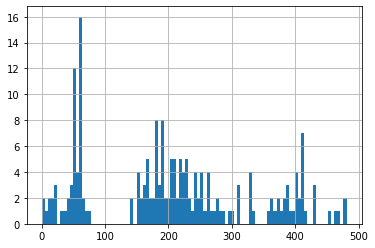

In [3]:
metadata["Number of Images"].hist(bins=100)

In [4]:
top_G=metadata["Subject ID"]
top_G=set([l[8:]for l in top_G])

In [5]:
metadata[metadata["Subject ID"]=="Lung_Dx-G0031"]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1095,1.3.6.1.4.1.14519.5.2.1.6655.2359.269178008582...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,A phase 5mm Stnd SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,180,95.16 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:57:21.274
1104,1.3.6.1.4.1.14519.5.2.1.6655.2359.265088720385...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,5mm Lung SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,60,31.72 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:59:18.934


In [6]:
#Transform rgb ctscan to grayscale using:(0.3 * R) + (0.59 * G) + (0.11 * B) 
def ct_to_gray(ctscan):
    r = ctscan[:,:,0]
    g = ctscan[:,:,1]
    b = ctscan[:,:,2]
    graybmp = np.multiply(0.3*r, 0.59*g)
    graybmp = np.multiply(graybmp, 0.11*b)
    return graybmp

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

class DICOMDataset(Dataset):
    def __init__(self, matrix_list, y_list):
        self.matrix_list = matrix_list
        self.y_list = y_list
        
    def __len__(self):
        return len(self.matrix_list)
    
    def __getitem__(self, idx):
        matrix = self.matrix_list[idx]
        y = self.y_list[idx]
        
        return matrix, y



In [8]:
###find files
import pydicom
from matplotlib import pyplot as plt
import cv2

dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        #print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
            image_data = v[0]
            image_data=[int(i) for i in image_data]
            
            bounding_box = [image_data[0], image_data[1], image_data[2], image_data[3]]
            #print(bounding_box)

            dcm_path, dcm_name = lungs[k[:-4]]
            dicom_image = pydicom.read_file(dcm_path)
            #print(matrix,matrix.shape,ch)
            pixel_array = dicom_image.pixel_array.astype(np.float)
            if len(pixel_array.shape) == 3: #assume bitmap is rgb
                pixel_array = ct_to_gray(pixel_array)
                
            pixel_array = pixel_array / np.max(pixel_array)
            #print(pixel_array,pixel_array.shape)
            #bw_image = np.zeros_like(pixel_array)
            #threshold=0.5
            #bw_image[pixel_array > threshold] = 1
            #del pixel_array
            #mask = np.zeros_like(pixel_array)
            #mask[image_data[1]:image_data[3], image_data[0]:image_data[2]] = 1
            #print(bw_image,bw_image.shape)
            pixel_array = np.expand_dims(pixel_array, axis=-1)
            #print(pixel_array.shape)
            #print(dcm_path)
            #plt.imshow(pixel_array, cmap='gray')
            #plt.show()
            #plt.imshow(mask, cmap='gray')
            #plt.show()
            #ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            #break
            x_all.append(torch.tensor(pixel_array))

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(torch.tensor(np.array([image_data[0], image_data[1], image_data[2], image_data[3]])))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)

/tmp/ipykernel_565784/2662670305.py:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_array = dicom_image.pixel_array.astype(np.float)


missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.469388796898719175810353557871.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.253499093725222144225669530250.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.136788945074661422691341468449.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.290562187116107174337012530942.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.264347398825533405596428888416.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.739386460021914982547403695156.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.119252578514908170756674082512.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.289795777072556464918247262981.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.218726992178117761342346852656.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.320042227231064887825199401077.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.

/tmp/ipykernel_565784/2662670305.py:70: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x_all = np.array(x_all)
/tmp/ipykernel_565784/2662670305.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_all = np.array(x_all)
/tmp/ipykernel_565784/2662670305.py:71: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding prot

In [14]:
np.random.seed(69)
sampled_index = np.random.choice(np.array(list(range(len(x_all)))), size=100, replace=False)
sampled_index              

array([823, 999, 891, 781, 967, 764, 954, 693,  26,  99, 811,   3, 658,
       112,  42, 666, 809, 386, 531, 463, 102, 461, 321,  45,  55, 829,
       976, 873, 146, 962, 879, 171, 282, 750, 271, 125, 252,  20, 888,
       264, 634, 762, 582, 825, 530, 866, 814,   4, 157, 328, 794, 757,
       356, 617, 305, 599, 594, 436, 294, 265, 218, 444, 766, 529, 151,
       111, 852, 293, 148, 560, 842, 574, 936, 465, 476, 389,  34, 306,
       670, 980, 876, 221, 889, 649, 136,  91, 692, 334, 899, 160, 652,
       401, 181, 211, 205,  27, 875,  30, 260, 236])

In [15]:
x_all=x_all[sampled_index]
y_all=y_all[sampled_index]


In [16]:
print(x_all.shape)
print(y_all.shape)

(100,)
(100,)


In [17]:
custom_dataset = DICOMDataset(x_all, y_all)

# Split dataset into train and test
train_size = int(0.8 * len(custom_dataset))
test_size = len(custom_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, test_size])

# Create dataloaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Trying Torch model 

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Define model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 128 * 128, 256)
        self.fc2 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 128 * 128)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define model, loss function, and optimizer
model = MyModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Train model
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        #print(torch.permute(inputs,(0,3,1,2)).size())
        inputs=torch.permute(inputs,(0,3,1,2))
        inputs=inputs.float()
        outputs = model(inputs)
        labels=labels.float()
        loss = criterion(outputs, labels)
        for i in range(len(outputs)):
            print(outputs[i],labels[i])
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d, loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Evaluate model on test set
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        # Visualize attention map
        attention_map = model.attention_map(inputs)
        print(attention_map)


tensor([0.0266, 0.0188, 0.0564, 0.0394], grad_fn=<SelectBackward0>) tensor([115., 244., 173., 289.])
tensor([0.0100, 0.0115, 0.0581, 0.0422], grad_fn=<SelectBackward0>) tensor([142., 277., 238., 357.])
tensor([0.0274, 0.0231, 0.0510, 0.0400], grad_fn=<SelectBackward0>) tensor([186., 300., 233., 356.])
tensor([0.0252, 0.0199, 0.0509, 0.0325], grad_fn=<SelectBackward0>) tensor([319., 260., 359., 300.])
tensor([0.0293, 0.0217, 0.0475, 0.0396], grad_fn=<SelectBackward0>) tensor([295., 294., 388., 400.])
tensor([0.0289, 0.0204, 0.0450, 0.0383], grad_fn=<SelectBackward0>) tensor([301., 300., 388., 403.])
tensor([0.0122, 0.0174, 0.0515, 0.0429], grad_fn=<SelectBackward0>) tensor([152., 176., 219., 286.])
tensor([0.0270, 0.0262, 0.0499, 0.0405], grad_fn=<SelectBackward0>) tensor([325., 271., 355., 325.])
tensor([0.0208, 0.0246, 0.0546, 0.0395], grad_fn=<SelectBackward0>) tensor([169., 315., 226., 415.])
tensor([0.0216, 0.0235, 0.0512, 0.0362], grad_fn=<SelectBackward0>) tensor([158., 310., 232

Epoch 1, loss: 314615004.864
tensor([2.2137e+08, 2.2699e+08, 2.7023e+08, 2.9459e+08],
       grad_fn=<SelectBackward0>) tensor([154., 181., 228., 290.])
tensor([1.7864e+08, 1.7969e+08, 2.1288e+08, 2.3109e+08],
       grad_fn=<SelectBackward0>) tensor([133., 292., 181., 347.])
tensor([1.8865e+08, 1.9205e+08, 2.2591e+08, 2.4658e+08],
       grad_fn=<SelectBackward0>) tensor([296., 329., 349., 376.])
tensor([2.8516e+08, 2.9823e+08, 3.5234e+08, 3.8821e+08],
       grad_fn=<SelectBackward0>) tensor([317., 274., 360., 336.])
tensor([1.6530e+08, 1.6575e+08, 1.9429e+08, 2.1131e+08],
       grad_fn=<SelectBackward0>) tensor([340., 262., 412., 346.])
tensor([2.9204e+08, 3.0231e+08, 3.5935e+08, 3.9368e+08],
       grad_fn=<SelectBackward0>) tensor([308., 246., 387., 320.])
tensor([2.8411e+08, 2.9599e+08, 3.5052e+08, 3.8544e+08],
       grad_fn=<SelectBackward0>) tensor([186., 300., 233., 356.])
tensor([2.9297e+08, 3.0407e+08, 3.6088e+08, 3.9605e+08],
       grad_fn=<SelectBackward0>) tensor([334.

Epoch 2, loss: nan
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([344., 271., 370., 317.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([296., 329., 349., 376.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([340., 262., 412., 346.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([301., 246., 412., 331.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([301., 300., 388., 403.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([301., 336., 342., 372.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([275., 226., 378., 348.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([185., 305., 219., 354.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([140., 277., 198., 326.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([315., 250., 348., 292.])
tensor([nan, nan, nan, nan], grad_fn=<SelectBackward0>) tensor([155., 303., 236., 394.])
te

KeyboardInterrupt: 

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor



# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Train the model
for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
###find files
import pydicom
from matplotlib import pyplot as plt
import cv2

dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        #print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
            image_data = v[0]
            image_data=[int(i) for i in image_data]
            
            bounding_box = [image_data[0], image_data[1], image_data[2], image_data[3]]
            print(bounding_box)

            dcm_path, dcm_name = lungs[k[:-4]]
            dicom_image = pydicom.read_file(dcm_path)
            #print(matrix,matrix.shape,ch)
            pixel_array = dicom_image.pixel_array.astype(np.float)
            if len(pixel_array.shape) == 3: #assume bitmap is rgb
                pixel_array = ct_to_gray(pixel_array)
                
            pixel_array = pixel_array / np.max(pixel_array)
            #print(pixel_array,pixel_array.shape)
            #bw_image = np.zeros_like(pixel_array)
            #threshold=0.5
            #bw_image[pixel_array > threshold] = 1
            #del pixel_array
            mask = np.zeros_like(pixel_array)
            mask[image_data[1]:image_data[3], image_data[0]:image_data[2]] = 1
            #print(bw_image,bw_image.shape)
            pixel_array = np.expand_dims(pixel_array, axis=-1)
            print(pixel_array.shape)
            print(dcm_path)
            plt.imshow(pixel_array, cmap='gray')
            plt.show()
            plt.imshow(mask, cmap='gray')
            plt.show()
            #ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            break
            x_all.append(ctscan_map)

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(np.array([v[0][0], v[0][1], v[0][2], v[0][3]]))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)